In [1]:
!pip install --upgrade scikit-learn


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
#Import de modelos a serem treinados
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
caminho_do_arquivo = '/content/Mall_Customers.csv'

# Carregue o arquivo CSV em um DataFrame do pandas
df = pd.read_csv(caminho_do_arquivo)
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
#Eu acredito que o ID não é uma informação que tem relação com o score, é apenas uma identificação por ordem
df = df.drop('CustomerID', axis=1)
df = df[['Gender_Male', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
df.head()

# Visualize as primeiras linhas do DataFrame para ter uma ideia dos dados
df.head()

,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [6]:
#Verificação de dados ausentes
df.isnull().sum()

Gender_Male               0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
scaler = MinMaxScaler()

# Aplique a normalização às colunas numéricas
df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df.head()

,Gender_Male,Age,Annual Income (k$),Spending Score (1-100)
0,1,0.019231,0.000000,0.387755
1,1,0.057692,0.000000,0.816327
2,0,0.038462,0.008197,0.051020
3,0,0.096154,0.008197,0.775510
4,0,0.250000,0.016393,0.397959


In [8]:
# Calcule a correlação
correlation_Gender = df['Gender_Male'].corr(df['Spending Score (1-100)'])
correlation_Age = df['Age'].corr(df['Spending Score (1-100)'])
correlation_Annual = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])

print(f"Correlação entre 'Gender' e 'Spending Score (1-100)': {correlation_Gender}")
print("............")
print(f"Correlação entre 'Age' e 'Spending Score (1-100)': {correlation_Age}")
print("............")
print(f"Correlação entre 'Annual' e 'Spending Score (1-100)': {correlation_Annual}")
print("............")

Correlação entre 'Gender' e 'Spending Score (1-100)': -0.05810873926162072
............
Correlação entre 'Age' e 'Spending Score (1-100)': -0.32722684603909047
............
Correlação entre 'Annual' e 'Spending Score (1-100)': 0.009902848094037612
............


In [9]:
x = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Defina uma lista de modelos
modelos = [
    ('Regressão Linear', LinearRegression()),
    ('Árvore de Decisão', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# Desempenho
resultados_mse = {}
resultados_r2 = {}

# Crie um loop para treinar e avaliar os modelos
for nome_modelo, modelo in modelos:
    modelo.fit(x_train, y_train)
    previsoes = modelo.predict(x_test)
    mse = mean_squared_error(y_test, previsoes)
    r2 = r2_score(y_test, previsoes)
    resultados_mse[nome_modelo] = mse
    resultados_r2[nome_modelo] = r2

# Classifique os modelos com base no MSE (do menor ao maior)
modelos_classificados_mse = sorted(resultados_mse.items(), key=lambda x: x[1])

# Classifique os modelos com base no R² (do maior ao menor)
modelos_classificados_r2 = sorted(resultados_r2.items(), key=lambda x: x[1], reverse=True)

# Exiba as listas classificadas
print("Classificação dos Modelos com base no MSE (Quanto menor melhor):")
for nome_modelo, mse in modelos_classificados_mse:
    print(f'Modelo: {nome_modelo}, MSE: {mse}')

print("\nClassificação dos Modelos com base no R² (Quanto maior melhor):")
for nome_modelo, r2 in modelos_classificados_r2:
    print(f'Modelo: {nome_modelo}, R²: {r2}')

Classificação dos Modelos com base no MSE (Quanto menor melhor):
Modelo: Gradient Boosting, MSE: 0.04012947396548916
Modelo: Random Forest, MSE: 0.04622679258555465
Modelo: Regressão Linear, MSE: 0.05004926506739358
Modelo: Árvore de Decisão, MSE: 0.07950333194502288

Classificação dos Modelos com base no R² (Quanto maior melhor):
Modelo: Gradient Boosting, R²: 0.21862892716617077
Modelo: Random Forest, R²: 0.09990650395007117
Modelo: Regressão Linear, R²: 0.025478181600746108
Modelo: Árvore de Decisão, R²: -0.54802935690536


In [11]:
# Inicialize o modelo Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)

# Treine o modelo nos dados de treinamento
modelo_gb.fit(x_train, y_train)

# Faça previsões no conjunto de teste
previsoes_gb = modelo_gb.predict(x_test)

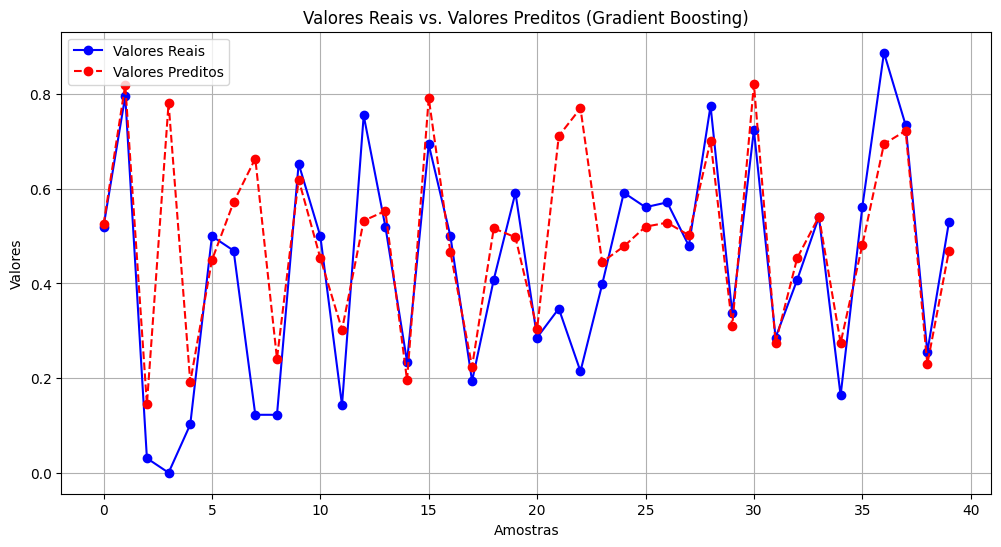

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Valores Reais', marker='o', linestyle='-', color='b')
plt.plot(range(len(previsoes_gb)), previsoes_gb, label='Valores Preditos', marker='o', linestyle='--', color='r')
plt.xlabel("Amostras")
plt.ylabel("Valores")
plt.title("Valores Reais vs. Valores Preditos (Gradient Boosting)")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
from joblib import dump

dump(modelo_gb, 'modelo_gb.joblib')

['modelo_gb.joblib']